
no. of low steering images paths:  5923
no. of notlow steering images paths:  2113


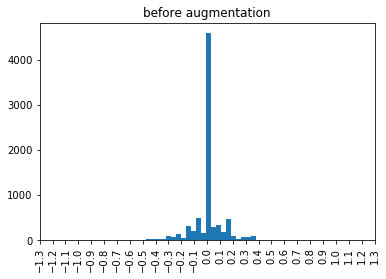

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2

def reducedNoOfImagesPaths(imagesPaths, quantity):
    imagesPaths = random.sample(imagesPaths, int(quantity))
    return imagesPaths

def cropImage(image):
    image = image[60:140,:,:]
    return image

def resizeImage(image):
    #image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)))

    # nvidia model requirement
    # rows-66, columns-200
    image = cv2.resize(image, (200, 66))
    return image

def rgb2yuv(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    return image

def flipVertical(image):
    image = cv2.flip(image, 1)
    return image

initialSteeringAngle = []
lowSteeringImagesPaths = []
notLowSteeringImagesPaths = []

with open('data/driving_log.csv', mode='r') as f:
    next(f) # skip the first line
    reader = csv.reader(f)
    for row in reader:
        initialSteeringAngle.append(float(row[3]) + 0.0)
        if (float(row[3])<0.1 and float(row[3])>-0.1):
            lowSteeringImagesPaths.append(row)
        else:
            notLowSteeringImagesPaths.append(row)

#print(lowSteeringAnglePaths)
# print()
# print(lowSteeringImagesPaths[0])
# print()
# print(lowSteeringImagesPaths[0][0])
# print()
# print(notLowSteeringImagesPaths[0])
print()
print('no. of low steering images paths: ', len(lowSteeringImagesPaths))
print('no. of notlow steering images paths: ',len(notLowSteeringImagesPaths))

###########################################################
#     plotting histogram
###########################################################

histRange = plt.hist(initialSteeringAngle, bins=50)
plt.xticks(np.arange(-1.3,1.4,0.1), rotation=90)
plt.title('before augmentation')
plt.show()
            


no. of reduced low steering images paths:  394
no. of reduced not low steering images paths:  2113
no. of reduced (low + notlow) steering images paths:  2507
imagesPathsAll length- 2507
IMG/center_2016_12_01_13_44_46_893.jpg


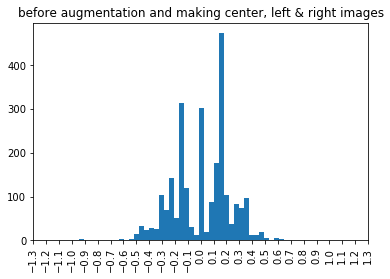

In [2]:

##################################################################################
#     reducing low(to may be 50% or less) & notLow steering angles images paths
#     & then combining all images together
#################################################################################

reducedLowSteeringImagesPaths = reducedNoOfImagesPaths(lowSteeringImagesPaths, len(lowSteeringImagesPaths)/15)
# print()
# print(reducedLowSteeringImagesPaths)
print()
print('no. of reduced low steering images paths: ',len(reducedLowSteeringImagesPaths))

reducedNotLowSteeringImagesPaths = reducedNoOfImagesPaths(notLowSteeringImagesPaths, len(notLowSteeringImagesPaths))
# print()
# print(reducedNotLowSteeringImagesPaths)
# print()
print('no. of reduced not low steering images paths: ',len(reducedNotLowSteeringImagesPaths))

print('no. of reduced (low + notlow) steering images paths: ',(len(reducedLowSteeringImagesPaths) + len(reducedNotLowSteeringImagesPaths)))


imagesPathsAll = []
for i in range(len(reducedLowSteeringImagesPaths)):
    imagesPathsAll.append(reducedLowSteeringImagesPaths[i])

# print()
# print(imagesPathsAll)
# print()
# print(len(imagesPathsAll))


for i in range(len(reducedNotLowSteeringImagesPaths)):
    imagesPathsAll.append(reducedNotLowSteeringImagesPaths[i])

# print()
#print(imagesPathsAll)
# print()
print('imagesPathsAll length-',len(imagesPathsAll))

# print()
print(imagesPathsAll[4][0])

###########################################################
#     plotting histogram for initialReducedSteeringAngle
###########################################################
initialReducedSteeringAngle = []
for i in range(len(imagesPathsAll)):
    # center images
    #imagesPaths.append(imagesPathsAll[i][0].replace(" ", ""))
    initialReducedSteeringAngle.append(float(imagesPathsAll[i][3]) + 0.0)
histRange = plt.hist(initialReducedSteeringAngle, bins=50)
plt.xticks(np.arange(-1.3,1.4,0.1), rotation=90)
plt.title('before augmentation and making center, left & right images')
plt.show()

##################################################################################
#     making arrays for images paths & corresponding steering angles
#################################################################################



final total images paths individually:  7521
final total steering angles individually:  7521


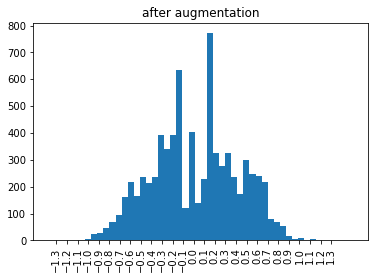

In [3]:

imagesPaths = []
steeringAngle = []
for i in range(len(imagesPathsAll)):
    # center images
    imagesPaths.append(imagesPathsAll[i][0].replace(" ", ""))
    steeringAngle.append(float(imagesPathsAll[i][3]) + 0.0)
    #print('sa-',row[3])

    #left images, stripping starting space
    imagesPaths.append(imagesPathsAll[i][1].replace(" ", ""))
    # randomly adding angles for left images
    steeringAngle.append(float(imagesPathsAll[i][3]) + 0.15*random.uniform(2, 3.5))

    # right images, stripping starting space
    imagesPaths.append(imagesPathsAll[i][2].replace(" ", ""))
    # randomly adding angles for right images
    steeringAngle.append(float(imagesPathsAll[i][3]) - 0.15*random.uniform(2, 3.5))

    # making numpy array straight away5
    #imagesPathsNP = np.append(imagesPathsNP,row[0])
    #steeringAngleNP = np.append(steeringAngleNP,row[3])

# print()
# print(imagesPathsAll)
# print()
# print(imagesPaths)
# print()
# print(steeringAngle)

print()
print('final total images paths individually: ',len(imagesPaths))
print('final total steering angles individually: ',len(steeringAngle))


###########################################################
#     plotting histogram
###########################################################

histRange = plt.hist(steeringAngle, bins=50)
plt.xticks(np.arange(-1.3,1.4,0.1), rotation=90)
plt.title('after augmentation')
plt.show()

In [ ]:
#########         displaying some images         #############

basePath =  "./data/"

print(basePath + imagesPaths[0])
image = mpimg.imread(basePath + imagesPaths[0]);
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()
print ('vertical (or mirror copy)')
plt.imshow(flipVertical(image))
plt.show()

print(basePath + imagesPaths[1])
image = mpimg.imread(basePath + imagesPaths[1]);
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()

print(basePath + imagesPaths[2])
image = mpimg.imread(basePath + imagesPaths[2]);
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()

In [ ]:
#########         displaying cropped images         #############


print(basePath + imagesPaths[0])
image = mpimg.imread(basePath + imagesPaths[0]);
image = cropImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()

print(basePath + imagesPaths[1])
image = mpimg.imread(basePath + imagesPaths[1]);
image = cropImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()

print(basePath + imagesPaths[2])
image = mpimg.imread(basePath + imagesPaths[2]);
image = cropImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
#plt.imshow(rgb2yuv(image));plt.show()

In [ ]:
#########         displaying (cropped + resized + rgb2yuv) images         #############


print(basePath + imagesPaths[0])
image = mpimg.imread(basePath + imagesPaths[0]);
image = cropImage(image)
image = resizeImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
plt.imshow(rgb2yuv(image))
plt.show()

print(basePath + imagesPaths[1])
image = mpimg.imread(basePath + imagesPaths[1]);
image = cropImage(image)
image = resizeImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
plt.imshow(rgb2yuv(image))
plt.show()

print(basePath + imagesPaths[2])
image = mpimg.imread(basePath + imagesPaths[2]);
image = cropImage(image)
image = resizeImage(image)
print(image.shape)
plt.imshow(image)
plt.show()
plt.imshow(rgb2yuv(image))
plt.show()

no. of imagesTogether before flipping:  7521
no. of steeringAngle before flipping:  7521


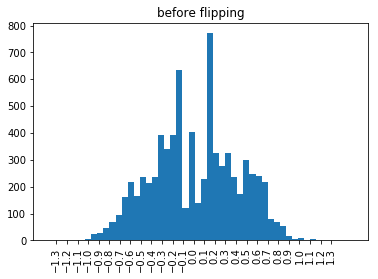

no. of imagesTogether after flipping:  11232
no. of steeringAngle after flipping:  11232
last image steering angle 0.6348220962194022


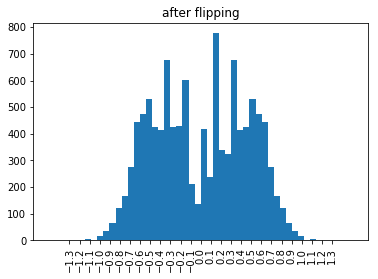

(66, 200, 3)
before numpy
(11232, 66, 200, 3)
(11232,)


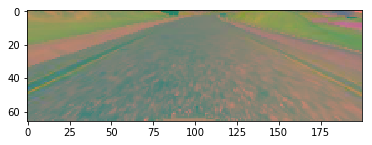

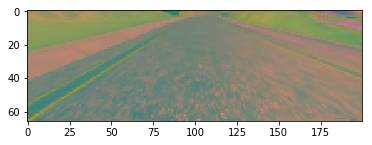

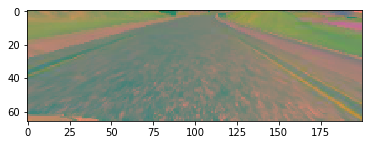

-1.506444076365577 1.506444076365577


In [5]:
basePath =  "./data/"
imagesTogether = []
for i in range (len(imagesPaths)):
    #image = mpimg.imread((centerImagesPaths[i]));
    image = mpimg.imread((basePath + imagesPaths[i]));

    # cropping image
    image = cropImage(image)

    # preprocessing - reduce image size to decrease computation time
    image = resizeImage(image)
    #plt.imshow(image);  plt.show()

    #rgb tu yuv image conversion
    image = rgb2yuv(image)
    #plt.imshow(image);  plt.show()

    imagesTogether.append(image)
    #plt.imshow(images[i]);  plt.show()


print('no. of imagesTogether before flipping: ',len(imagesTogether))
print('no. of steeringAngle before flipping: ',len(steeringAngle))


###########################################################
#     plotting histogram
###########################################################

histRange = plt.hist(steeringAngle, bins=50);
plt.xticks(np.arange(-1.3,1.4,0.1), rotation=90)
plt.title('before flipping');
plt.show();


for i in range (len(imagesTogether)):
    # adding flipped images
    if(steeringAngle[i]>0.3 or steeringAngle[i]<-0.3):
        imageFlipped = flipVertical(imagesTogether[i])
        imagesTogether.append(imageFlipped)
        steeringAngle.append(-steeringAngle[i])

print('no. of imagesTogether after flipping: ',len(imagesTogether))
print('no. of steeringAngle after flipping: ',len(steeringAngle))
print('last image steering angle', steeringAngle[-1])

###########################################################
#     plotting histogram
###########################################################

histRange = plt.hist(steeringAngle, bins=50);
plt.xticks(np.arange(-1.3,1.4,0.1), rotation=90)
plt.title('after flipping');
plt.show();





print(imagesTogether[0].shape)
print("before numpy")

imagesTogetherNP = np.array(imagesTogether)
print(imagesTogetherNP.shape)
steeringAngleNP = np.array(steeringAngle)
print(steeringAngleNP.shape)

plt.imshow(imagesTogetherNP[0])
plt.show()
plt.imshow(imagesTogetherNP[1])
plt.show()
plt.imshow(imagesTogetherNP[2])
plt.show()


print(min(steeringAngle), max(steeringAngle))

In [6]:
##################################################333
#  train and test data
####################################################3


X_train = imagesTogetherNP
y_train = steeringAngleNP

# convert from int to float
X_train = X_train.astype('float32')
y_train= y_train.astype('float32')

print(min(y_train), max(y_train))
#print(y_train.min(), y_train.argmin())


# preprocessing of data here

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.01, random_state = 0)

assert(X_train.shape[0] == y_train.shape[0]), "The number of train images is not equal to the number of labels."
assert(X_validation.shape[0] == y_validation.shape[0]), "The number validation of images is not equal to the number of labels."


print("printing...")
print(X_train.shape)
print(X_train.shape[1])
print(X_train.shape[2])

-1.50644 1.50644
printing...
(11119, 66, 200, 3)
66
200


Using TensorFlow backend.


nvidia model...

(None, 66, 200, 3)
(None, 31, 98, 24)
(None, 14, 47, 36)
(None, 5, 22, 48)
(None, 3, 20, 64)
(None, 1, 18, 64)
(None, 1152)
(None, 100)
(None, 50)
(None, 10)
(None, 1)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Normalization (Lambda)           (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
Conv1 (Convolution2D)            (None, 31, 98, 24)    1824        Normalization[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 31, 98, 24)    0           Conv1[0][0]                      
____________________________________________________________________________________________________
Conv2 (

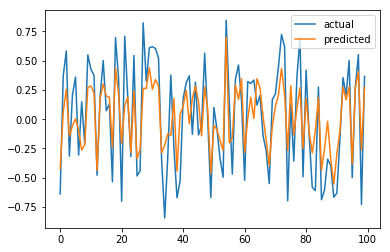

[-0.55354059] [ 0.70018148]

Saving model weights and configuration file.

Model Saved.


In [7]:
######################################################
#    model
#####################################################


# TODO: Build a two-layer feedforward neural network with Keras here.
from keras.models import Sequential
from keras.layers import Convolution2D,  Dropout, Flatten, Lambda
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import json
#from keras.callbacks import ModelCheckpoint


"""
#################################
#   comma.ai model
#################################
#model = Sequential()
#model.add(Convolution2D(64, 3, 3, input_shape=(160, 320, 3), border_mode='same'))
#print(model.output_shape)
## add a 3x3 convolution on top, with 32 output filters:
#model.add(Convolution2D(32, 3, 3, border_mode='same'))
#print(model.output_shape)
# from comma.ai
model = Sequential()
#model.add(BatchNormalization(input_shape=input_shape))
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(X_train.shape[1], X_train.shape[2], 3)))
print(model.output_shape)
model.add(Convolution2D(3, 1, 1, border_mode='same', name='color_conv'))
model.add(Convolution2D(16, 8, 8,  subsample=(4, 4), border_mode="same"))
print(model.output_shape)
model.add(ELU())
model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
print(model.output_shape)
model.add(ELU())
model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dropout(.2))
model.add(ELU())
model.add(Dense(512))
print(model.output_shape)
model.add(Dropout(.5))
model.add(ELU())
model.add(Dense(1))
print(model.output_shape)
model.summary()
"""




#######################################
#   nvidia model
#######################################

print("nvidia model...\n")

model = Sequential()
model.add(Lambda(lambda x: x/255 - 0.5, input_shape=(X_train.shape[1], X_train.shape[2], 3), name='Normalization'))
print(model.output_shape)
model.add(Convolution2D(24, 5, 5, activation='relu', border_mode='valid', subsample=(2,2), name='Conv1'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Convolution2D(36, 5, 5, activation='relu', border_mode='valid', subsample=(2,2), name='Conv2'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Convolution2D(48, 5, 5, activation='relu', border_mode='valid', subsample=(2,2), name='Conv3'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='valid', subsample=(1,1), name='Conv4'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='valid', subsample=(1,1), name='Conv5'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
#model.add(Dense(1164, activation='relu', name='FC1'))
model.add(Dense(100, activation='relu', name='FC2'))
model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(50, activation='relu', name='FC3'))
#model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(10, activation='relu', name='FC4'))
model.add(Dropout(0.5))
print(model.output_shape)
model.add(Dense(1, name='final_output'))
print(model.output_shape)

model.summary()


# TODO: Compile and train the model here.
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# no. of EPOCHS
nbEpoch = 8



#print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator()

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=32)

print("here")



# saves the model weights after each epoch if the validation loss decreased
#checkpointer = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5", verbose=1, save_best_only=True)
#callbacks=[checkpointer]

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    samples_per_epoch=X_train.shape[0],
    nb_epoch=nbEpoch,
    validation_data=(X_validation, y_validation),
    )



print(history)

val_preds = model.predict(X_validation, batch_size=32)
print(val_preds)
#validation accuracy  <<-- not the best way, try loss infact
plt.plot(y_validation[0:100], label='actual');plt.legend();
plt.plot(val_preds[0:100], label='predicted');plt.legend();plt.show()
#plt.plot(y_validation, label='actual');plt.legend();
#plt.plot(val_preds, label='predicted');plt.legend();plt.show()
print(min(val_preds), max(val_preds))

# plt.figure()
# ax = plt.subplot(111)
# ax.plot(val_preds,label='predicted')
# ax.plot(y_validation,label='actual')
# ax.legend()
# plt.show()

print("\nSaving model weights and configuration file.")


with open('model.json', 'w') as f:
    json.dump(model.to_json(), f)
# Save model weights to file
model.save_weights('model.h5')
#print(model.get_weights())

#model.evaluate(x_test, y_test, batch_size=128))
print("\nModel Saved.")